In [1]:
from IPython.display import Image
%matplotlib inline

### Evrişimli Sinir Ağları

- Evrişimli sinir ağları (CNN - Convolutional Neural Networks) bilgisayarlı görü alanında başarılı sonuçlar vermesiyle günümüzde yaygın olarak kullanılmaktadır. "Evrişimli sinir ağı" adı, evrişim (convolution) işlemi olarak bilinen matematiksel bir yaklaşımdır. Özünde ızgara benzeri bilinen bir topoji kullanılarak veri işlenmektedir. Eğrişimsel ağlar basitçe, katmanlarından en az birinde matris çarpımı yerine evrişim işlemi yapan ağlardır.
- CNN, bilgisiyarlı görü alanında yaygın olarak kullanılıyor olsa da tek kullanım alanı bu değildir. Aynı zamanda metin, ses sınıflandırma problemlerinde de kullanılmaktadır. Keras’ta bilgisayarlı görü çalışmaları için Conv2d katmanı kullanılırken metin çalışmalarında Conv1d katmanı kullanılmaktadır. 
- Neden? Conv2d, 2 yönde hareket eden kernel’a sahip görüntü gibi 3 boyutlu veriler için kullanırken, Conv1d ise 1 yönde hareket eden kernel’a sahip girdi ve çıktıları 2 boyutlu olan veriler için kullanılmaktadır. Conv1d, zaman serileri, ses ve metin analizlerinde kullanılmaktadır.

**Bilgisayarlı Görü:**

- Günümüzde çok sınıflı etiketli verilerin ortaya çıkması, bilgisayarlı görü çalışmalarının artmasına neden olmuştuştur.
- Gelişen teknoloji --> Ekran Kartı Üniteleri (GPU)
- Birçok alanda görüntü problemiyle karşı karşıyayız. Bilgisayarlı görünün kullanıldığı alanlar:
    - Yüz tanıma problemi
    - Otonom araçlar
    - Savunma Sanaayi (Operasyonel Katkılar)
    - Nesne tanıma
    - Yangın alanlarının belirlenmesi
    - Sağlık alanında 
    - Video Analizleri

**Evrişim İşlemi**:

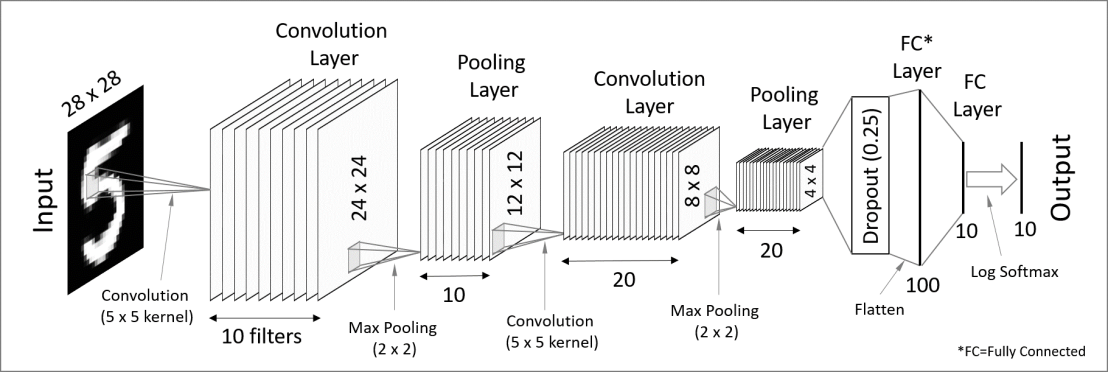

In [4]:
Image(filename='./cnn_mnist.png', width=1000)

- Özünde CNN, öğrenebilir ağırlık değerlerine sahip sıradan yapay sinir ağları ile oldukça benzerdir. Sinir ağında bulunan her nöron verileri girdi olarak alır, verileri işler ve doğrusal olmayan bir şekilde hesaplanan sonucu bir sonraki nörona aktarır. 
- Ağda bulunan her bir nöron, ağın başında verilen ham görüntü piksellerini işleyerek ağın sonunda bir sınıfa ait skor değerini hesaplamaktadır. Hesaplanan değer en son tamamen bağlı (fully connected) katmanda işlenerek görüntünün hangi sınıfa ait olduğu bilgisini veren tahmin değeri üretilir. 1998 yılında Yann LeCun ve arkadaşları tarafından yayınlanmış ve ilk başarılı sonucu veren evrişimli sinir ağı modeli LeNet-5'dir. Bu model posta numaraları, banka çekleri üzerindeki sayıların okunması için geliştirilmiştir. LeNet-5 modeli MNIST veri kümesi ile eğitilmiştir.

- Şekilde de görüldüğü üzere evrişimli sinir ağları, **evrişim katmanı (Convolution Layer - Keras'ta Conv2d)** ve **ortaklama katmanlarının (Pooling Layer - Keras'ta MaxPooling2D)** katmanlarının ard arda gelmesiyle oluşmaktadır.
- Evrişimli sinir ağları **(height, width, channels)** şeklinde girdiler beklemektedir. Yukarıdaki şekli dikkate aldığımızda girdilerimiz (28,28,1) şeklinde olacaktır.
- Tüm evrişim ve ortaklama katmanlarının çıktıları **(height, width, channels)** şeklinde bir 3B tensör olmaktadır.

- Evrişim katmanı ve tamamen bağlı katman arasındaki temel fark, öğrenme işlemi sırasında yaşanan bölgesel örüntü farklılıkları. Yani Dense katmanlar, global örüntüleri öğrenirken, evrişim katmanları bölgesel örüntüleri öğrenir.
- Bu durum evrişimli sinir ağlarına iki özellik vermektedir:
    - **Öğrendikleri örüntüler yön değiştirmez (transformation invariant):** Bir resmin herhangi bir köşesinde öğrendiği bir örüntüyü her yerde tanıyabilir. Tamamen bağlı ağlardan en temel farkı bu. Diğer türlü başka bir bölgede aynı örüntü ile karşılaştığında bunu da yeniden öğrenmesi gerekmektedir. Ayrıca bu özellik evrişimli sinir ağlarına daha az veri ile genelleştirme gücü yüksek gösterimleri öğrenebilme imkanı sağlıyor.
    - **Örüntüler uzamsal hiyerarşileri öğrenirler:** İlk evrişim katmanları köşeler gibi küçük bölgesel örüntüleri öğrenirken daha sonraki evrişim katmanları daha geniş örüntüler öğrenmektedir. Bu durum hiyerarşik bir şekilde devam eder.

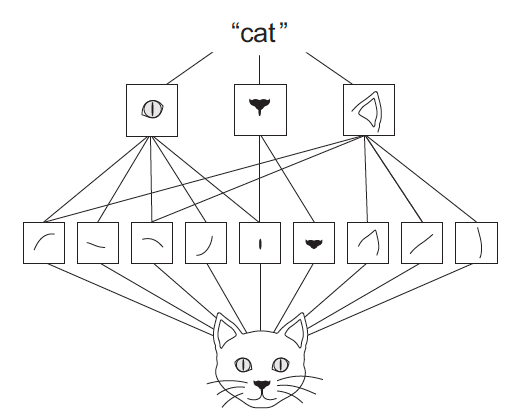

In [7]:
Image(filename='./cnn_cats.png', width=500)

**Not:**
    - Girdide elde edilen kenar bilgisi, bilgisayarlı görü çalışmaları için önemli bir özelliktir. Kenar bilgisini elde etmek için dikey ve yatay olmak üzere iki kenar ayrı ayrı kullanılmaktadır. Sobel, Prewitt, Gabor geleneksel yöntemlerdir.

- Evrişim 3B tensörler üzerinde işlem yapar. Bu tensörler literatürde **"feature maps"** olarak bilinen **nitelik haritası** adını alır. **Genişlik ve yükseklik** gibi iki uzamsal eksenin yanında ayrıca **derinlik veya kanal** olarak bilinen bir eksene daha sahiptir. **RGB** yani renkli bir resim de **üç renk kanalı** olduğu için derinlik 3'e eşittir. S**iyah-beyaz** resimlerde ise **1 kanal veya derinlik** mevcuttur.
- Evrişim işlemi, nitelik haritasından (feature maps) küçük parçalar çeker ve hepsine aynı dönüşümü uygulayarak çıktı öznitelik haritası üretir. Bu çıktı haritası hala 3B bir tensördür: Yükseklik, genişlik bilgisinin yanında bu sefer filtre bilgiside mevcuttur.

- MNIST öğreniğine geri dönersek, ilk evrişim katmanı (28,28,1) boyutunda girdi verisini alır ve (26,26,32) boyutunda bir *nitelik çıktı haritası (output feature map)* üretir. 32 sayısı girdi üzerinde yapılan filtre sayısıdır. Bu 32 çıktı kanalı da 26x26'lük grid değerleri bulundurur ve filtre, girdi üzerine uygulandığında *cevap haritasını (response map)* verir. 

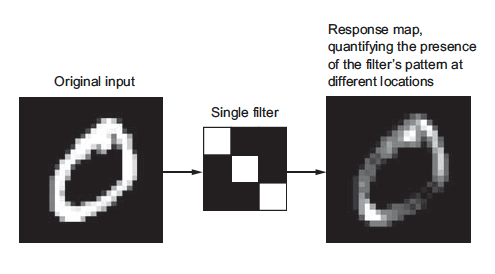

In [8]:
Image(filename='./cnn_responsemap.png', width=500)

- Evrişim için temel iki parametre:
    - **Girdiden çıkarılacak parçaların boyutu:** Genellikle 3x3 veya 5x5 olarak seçilir.
    - **Nitelik çıktı haritasının derinliği:** Evrişim sırasında hesaplanacak filtre sayısıdır.

- Evrişim işlemi 3B girdi nitelik üzerinde 3x3 veya 5x5'lik pencereyi kaydırarak her noktadan 3B parçalar çıkarır. Daha sonra tüm 3B parçalar 1B vektör şekline dönüştürülür. Tüm bu vektörel 2B uzay koordinatlarında yan yana getirilerek (height, width, output_depth) şeklinde 3B çıktı haritası oluşturulur. Bu haritanın uzay koordinatlarındaki her noktası girdi nitelik haritasında aynı noktaya karşılık gelir. Unutulmaması gereken bir nokta vardır. Çıktının genişliği ve yüksekliği, girdinin genişliği ve yüksekliğinden farklı olabilmektedir. Bunun temel sebepleri:
    - **Kenar etkisi** ve **adım aralığı**

**Detaylandırırsak:**
- Evrişim işleminde filtrenin x ve y eksenine göre simetriği alınmaktadır.
- Filtre girdi üzerinde hareket ederken her adımda çakışan değerler eleman eleman çarpılmakta ve tüm değerlerin toplamı çıkış matrisinin ilgili elemanı olarak kaydedilmektedir.
- Çıkış verisinin kanal sayısı da uygulanan filtre sayısıyla eşit olmaktadır. 
- Giriş görüntüsüne uygulanan filtre de aslında geri yayılımla güncelenen ağırlık matrisidir. Çıkış matrisine aktivasyon fonksiyonu uygulamadan önce skaler bir bias değeri eklenir.

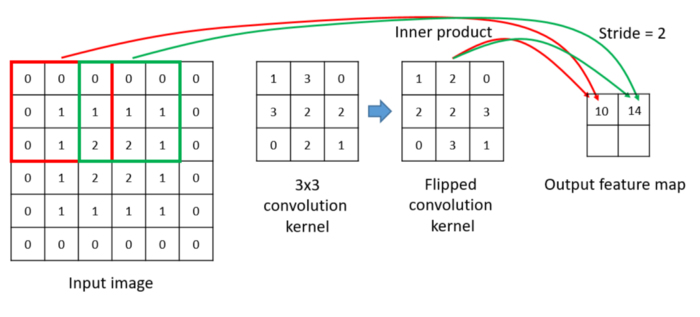

In [4]:
Image(filename='./cnn_evrişim.png', width=800)

#### Kenar Etkisi

- 5x5'lik bir nitelik haritası ele alalım (toplam döşeme sayısı 25). Bu döşemelerden 9 tanesinin üzerine 3x3'lük bir pencere yerleştirelim. Bu durumdan dolayı boyutta bir miktar küçülme meydana geldi. Her yerden 2 döşeme eksildi.
- Eğer girdi ile çıktı nitelik haritasının aynı boyutta olmasını istiyorsanız **doldurma** metodu kullanılmaktadır. Doldurma, girdi nitelik haritasının her yanına yeterli miktarda satır ve sütunlar ekleyerek tüm döşemelere evrişim penceresi oturtmamızı sağlar.
- Keras kütphanesinde Conv2D katmanlarında doldurma **padding** parametresiyle yapılandırılabilir: "valid" doldurma olmaması, "same" çıktının girdi ile aynı boyutta olması gereken doldurmanın yapılması anlamına gelir.

#### Adım Aralığı

- Çıktı büyüklüğüne etki eden bir diğer faktör de adım aralığıdır. İki evrişim işleminde merkezlerin birbirine olan mesafesi "adım aralığı" olarak belirtilen parametredir. Kerasta ön tanımlı değeri 1'dir. Adım aralığının 2 olması nitelik haritasının 1/2 oranına küçültülmesi anlamına gelir. Fakat genel olarak girdileri küçültmek için adım aralığı yerine en büyükleri biriktirme (max-pooling) kullanılır.

#### Pooling 

- Evrişimli sinir ağı modelinde boyut azaltmak için kullanılan bir diğer işlem ortaklama işlemidir. Bu katmanda maksimum ortaklama (Max-Pooling) yöntemi yaygın olarak kullanılmaktadır. Ortaklama işleminde giriş matrisinin kanal sayısı sabit tutulurken, yükselik ve genişlik azaltılmaktadır.
- Maksimum ortaklama, girdi nitelik haritasından penceler çıkarıp her kanalın en büyük değerini almasına dayanan bir işlemdir. Evrişim işlemine benzer bir işlem yapılmış olsa da tek farklılık öğrenilmiş bir doğrusal dönüşüm yerine  elle belirlenmiş bir kural olan max (en büyük) tensör işlemini yapar.

#### Evrişimli Sinir Ağlarına Örnekler:
- LeNet-5
- AlexNet
- VGG-16
- Res-Net
- GoogLeNet

### Referanslar
- Python ile Derin Öğrenme (Buzdağı Yayınevi)
- Derin Öğrenme ile Kalabalık Analizi Üzerine Detaylı Bir Araştırma, Merve Ayyüce Kızrak, https://dergipark.org.tr/tr/download/article-file/520262 

In [2]:
import keras
keras.__version__

'2.4.3'

In [3]:
import os, shutil

In [12]:
# Orijinal datanın bulunduğu kısım
# Bu ders kapsamında küçük bir veri setiyle çalışacağız. Bu sebeple sadece train verisi içerisinde 2000 tane 
# görüntü kullanılacak
original_dataset_dir = '/Users/kaanulgen/Istinye/2020_2021/veribilimi3/codes/dogs-vs-cats/kaggle_original_data/train'

# Orjinal verinin içerisinde seçtiğimiz 2000 görüntünün saklanacağı yer
base_dir = '/Users/kaanulgen/Istinye/2020_2021/veribilimi3/codes/dogs-vs-cats/cats_and_dogs_small'
#os.mkdir(base_dir)



In [13]:
# cats_and_dogs_small klasörü içerisinde alt klasör oluşuturcağız. Bunlar train, test ve validation

train_dir = os.path.join(base_dir, 'train')             # Eğitim verisinin bulacağı dizin
#os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')   # Validation verisinin bulacağı dizin
#os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')               # Test verisinin bulacağı dizin
#os.mkdir(test_dir)

In [14]:
# kedi eğitim verisinin bulunduğu dizin
train_cats_dir = os.path.join(train_dir, 'cats')
#os.mkdir(train_cats_dir)

# köpek eğitim verisinin bulunduğu dizin
train_dogs_dir = os.path.join(train_dir, 'dogs')
#os.mkdir(train_dogs_dir)

# kedi doğrulama verisinin bulunduğu dizin
validation_cats_dir = os.path.join(validation_dir, 'cats')
#os.mkdir(validation_cats_dir)

# köpek doğrulama verisinin bulunduğu dizin
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
#os.mkdir(validation_dogs_dir)

# kedi test verisinin bulunduğu dizin
test_cats_dir = os.path.join(test_dir, 'cats')
#os.mkdir(test_cats_dir)

# köpek test verisinin bulunduğu dizin
test_dogs_dir = os.path.join(test_dir, 'dogs')
#os.mkdir(test_dogs_dir)

In [8]:
# İlk 1000 kedi resmini eğitim verisi olarak alır ve train_cats_dir dizinine kopyalar
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    #print(src)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Sonraki 500 kedi resmini doğrulama verisi olarak alır ve validation_cats_dir dizinine kopyalar 
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Sonraki 500 kedi resmini test verisi olarak alır ve test_cats_dir dizinine kopyalar  
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# İlk 1000 köpek resmini eğitim verisi olarak alır ve train_dogs_dir dizinine kopyalar 
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Sonraki 500 köpek resmini doğrulama verisi olarak alır ve validation_dogs_dir dizinine kopyalar
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Conraki 500 köpek resmini test verisi olarak alır ve test_dogs_dir dizinine kopyalar 
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [9]:
print('Eğitim için kullanılacak toplam kedi sayısı:', len(os.listdir(train_cats_dir)))

Eğitim için kullanılacak toplam kedi sayısı: 1000


In [10]:
print('Eğitim için kullanılacak toplam köpek sayısı:', len(os.listdir(train_dogs_dir)))

Eğitim için kullanılacak toplam köpek sayısı: 1000


In [11]:
print('Doğrulama için kullanılacak toplam kedi sayısı:', len(os.listdir(validation_cats_dir)))

Doğrulama için kullanılacak toplam kedi sayısı: 500


In [12]:
print('Doğrulama için kullanılacak toplam köpek sayısı:', len(os.listdir(validation_dogs_dir)))

Doğrulama için kullanılacak toplam köpek sayısı: 500


In [13]:
print('Test için kullanılacak toplam kedi sayısı:', len(os.listdir(test_cats_dir)))

Test için kullanılacak toplam kedi sayısı: 500


In [15]:
print('Test için kullanılacak toplam köpek sayısı:', len(os.listdir(test_dogs_dir)))

Test için kullanılacak toplam köpek sayısı: 500


In [5]:
from keras import layers
from keras import models

# Model oluşturuluyor
model = models.Sequential()


#Evrişimli sinir ağı, evrişim (Conv2D) ve ortaklama (pooling -> MaxPooling2D) katmanlarıyla oluşturuluyor.
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# evrişim ve ortaklama katmanından gelen matrisler tek boyutlu dizilere dönüştürülür.
model.add(layers.Flatten())

# Tam bağlantı (fully connected) kısmında 2 katmanımız mevcut.
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

- Modelimiz içerisinde sıralı bir şeklide toplam dört evrişim ve dört ortaklama kapmanı bulunuyor. Bilindiği üzere klasik evrişimli sinir ağları sıralı bir şekilde evrişim ve ortaklama kapmanlarına sahiptir. İlk evrişim kapmanını incelediğimizde kanal sayısının 32 olduğunu görüyoruz. Yani 32 filtre kulllanılmış. Bununla beraber evrişim işleminde kullanılacak kernel'lar 3x3'lük. Evrişim katmanımız için kullanılan aktivasyon fonksiyonu ise ReLU olarak belirlenmiştir. Kullancağımız görüntülerin boyularını ise input_shape özelliğini kullanarak belirliyoruz. Bu örnek kapsamında 150x150x3 tercih edildi. Burada 3 renkli görüntü olduğu için RGB kanal sayısıdır.
- Evrişim katmanının hemen ardından ortaklama katmanını ekledik. Ortakalama katmanını eklememizin sebebi daha az katsayıyla işlem yapmak ve uzamsal hiyerarşileri ortaya çıkaracak şekilde evrişim katmanlarını her seferinde daha büyük pencerelere baktırmaktır. Bu uygulama kapsamında maksimum ortaklama kullanılmıştır. Seçilen kernel değeri 2x2'dir.
- Benzer yaklaşımla 3'er tane daha evrişim ve maksimum ortaklama kapmanları eklenmiştir.
- Model kapsamında nitelik haritalarının kanal (filtre) sayısı giderek büyümüştür. (32'den 128'e kadar)
- Evrişim ve maksimum ortaklama katmanlarındna sonra flatten katmanı kullanılmıştır. Bunun temel sebebi tam bağlantı (fully connected) katmanı için verileri hazırlamak. Bu katmanda evrişim ve maksimum ortaklama katmanlarından gelen matrisler tek boyutlu dizilere çevrilmektedir.
- Modelimizin son kısmında tam bağlantı (fully connected) katmanı mevcut. Burada tam bağlantı olarak iki katman kullanılmıştır. İlki 128 düğüm içerirken ikincisi 1 düğüm sayısına sahiptir. 1 düğüm sayısına sahahip olmamızın sebebi ise ikili sınıflandırma problemiyle uğraştığımız için. İkili sınıflandırma problemiyle uğraştığımız için son katmanın aktivasyon fonksiyonuda sigmoid'dir.

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

- Model.summary() diyerek birbirini takip eden katmanlarda nitelik haritalarının boyutlarını gösterdik.

- Sırada modelimizin derlenme kısmı mevcut. Derleme aşamasında en iyileme olarak rmsprop kullanılmıştır. Kayıp fonksiyonu olarak ise ağın bitiminde tek bir birim olduğu için binary_crossentropy tercih edilmiştir.

In [35]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

#### Veri Ön İşleme Adımı

- Resim dosyalarını oku.
- jpeg dosyalarının rgb görüntü noktalarına dönüştürülmesi.
- Bu noktaların tensörlere dönüştürülmesi
- Görüntü noktalarının değerlerini (0-255) yeniden ölçeklendir (0-1 aralığına)

In [36]:
# Görüntü işleme için kullanılacak modül
# ImageDataGenerator kullanılarak python üreteçleri yardımıyla ilgili 
# dosyalar yığınlar halinde işlenerek tensörlere dönüştürülür.
from keras.preprocessing.image import ImageDataGenerator

# Bütün resimler 1/255 ile ölçeklenir.
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # Hedef dizin
        train_dir,
        # Tüm resimler 150x150 boyutuna getirilir.
        target_size=(150, 150),
        batch_size=20,
        # kayıp fonksiyonu olarak binary_crossentropy kullanıldığı için ikili etiketler gerekiyor.
        class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [37]:
for data_batch, labels_batch in train_generator:
    print('Veri yığın boyutu:', data_batch.shape)
    print('Etiket yığın boyutu:', labels_batch.shape)
    break

Veri yığın boyutu: (20, 150, 150, 3)
Etiket yığın boyutu: (20,)


- Bu üretçleri kullanılarak modelimizi eğiteceğiz. Burada fit_generator metodu kullanıuoruz (daha önce kullanılan fit meto gibi kullanabiliriz)
- Bu metod ilk olarak, girdi ve python üretecini beklemektedir (train_generator)
- Üreteçler sonu belirsiz bir şekilde veri ürettiği için Keras modeli epok bitimine kadar kaç örnek üzerinden geçtiğini bir şekilde bilmelidir. Bu sebeple steps_per_epoch kullanılır. steps_per_epoch parametresiyle üreteçten kaç defa yığın alınacağı, kaç defa gradyan inişi algoritması çalışacağını ve ne zaman diğer epoka başlanacağını belirler. Bizim örneğimizde yığın büyüklüğü 20,100 yığın alınacak ve toplamda 2000 örnek üzerinden geçilecek.
- validation_data üreç olarak kullanılıyor. Buna ek olarak validation_steps parametresiyle doğrulama için kaç defa yığın alınacağı belirleniyor.

In [38]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 123s 1s/step - loss: 0.6989 - acc: 0.5201 - val_loss: 0.6785 - val_acc: 0.5700
Epoch 2/30
100/100 [==============================] - 123s 1s/step - loss: 0.6678 - acc: 0.5954 - val_loss: 0.6617 - val_acc: 0.5930
Epoch 3/30
100/100 [==============================] - 126s 1s/step - loss: 0.6119 - acc: 0.6581 - val_loss: 0.6114 - val_acc: 0.6510
Epoch 4/30
100/100 [==============================] - 130s 1s/step - loss: 0.5695 - acc: 0.6821 - val_loss: 0.6072 - val_acc: 0.6480
Epoch 5/30
100/100 [==============================] - 131s 1s/step - loss: 0.5380 - acc: 0.7390 - val_loss: 0.6150 - val_acc: 0.6500
Epoch 6/30
100/100 [==============================] - 134s 1s/step - loss: 0.5128 - acc: 0.7361 - val_loss: 0.5890 - val_acc: 0.6790
Epoch 7/30
100/100 [==============================] - 145s 1s/step - loss: 0.4896 - acc: 0.7529 - val_loss: 0.5644 - val_acc: 0.6860
Epoch 8/30
100/100 [==============================] - 140s 1s/step - 

- Sırada ilgili modelimizin kaydedilmesi var.

In [39]:
model.save('cats_and_dogs_small_1.h5')

- Eğitim ve doğrulama verileri üzerinden modelin kaybını ve başarımını çizdirelim.

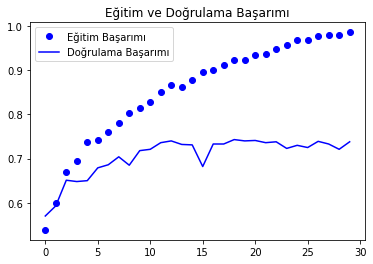

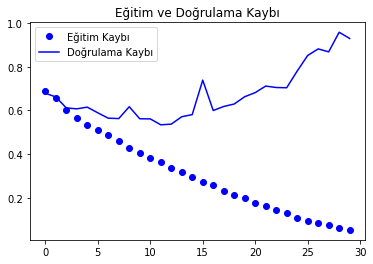

In [40]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Eğitim Başarımı')
plt.plot(epochs, val_acc, 'b', label='Doğrulama Başarımı')
plt.title('Eğitim ve Doğrulama Başarımı')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Eğitim Kaybı')
plt.plot(epochs, val_loss, 'b', label='Doğrulama Kaybı')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.legend()

plt.show()

- Görüldüğü üzere modelimiz aşırı uydurma göstermiştir.

#### Veri Çeşitlendirme 

- Aşırı uydurma, öğrenilecek veri seti az olduğunda modeli eğitmenin yeni verelere genelleştirilmemesi olarak ortaya çıkar. 
- Veri çeşitlendirme eldeki verileri bir takım dönüşümler ile daha fazla eğitim verisi oluşturur.
- Amaç eğitim esnasında farklı verilerle karşılaşmaktır.

In [41]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

- rotation_range: derece cinsinden resimleri döndürme.
- width_shift_range ve height_shift_range, resimleri yatayda ve dikeyde kaydırma oranıdır.
- shear_range: burkma işlemi
- zoom_range: yakınlaştırma işlemi
- horizontal_flip: dikeyde resmi döndürme
- fill_mode: kaydırma, döndürme b. işlem sonrası ortaya çıkan fazla görüntü noktalarının nasıl doldurulacağını belirler.

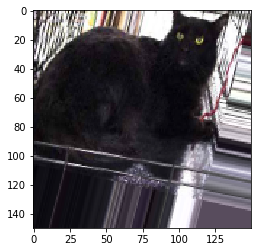

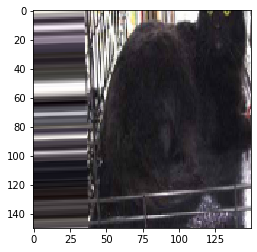

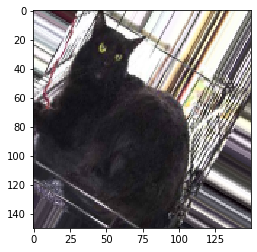

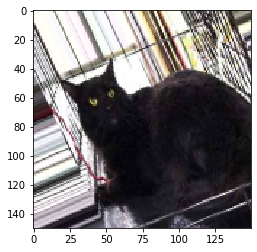

In [42]:
# Görüntü işleme modülü
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# çeşitlendirmek için seçilen resim
img_path = fnames[8]

# Resmi oku ve yeniden boyutlandır
img = image.load_img(img_path, target_size=(150, 150))

# (150, 150, 3) Numpy dizisine çevrilir.
x = image.img_to_array(img)

x = x.reshape((1,) + x.shape)


# Rastgele dönüştürülmüş veri resim yığınları oluşturur. Sonsuz döngü olacağından bir noktada durması gerekir.
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

- Veri çeşitlendirme işleminden sonra aşırı uydurmadan kurulabilmek için ayrıca dropout katmanı eklenmiştir.

In [26]:
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [27]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(  
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = valid_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [28]:
history2 = model2.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/50
100/100 [==============================] - 119s 1s/step - loss: 0.6983 - acc: 0.5092 - val_loss: 0.6896 - val_acc: 0.5300
Epoch 2/50
100/100 [==============================] - 115s 1s/step - loss: 0.6919 - acc: 0.5209 - val_loss: 0.6817 - val_acc: 0.5700
Epoch 3/50
100/100 [==============================] - 151s 2s/step - loss: 0.6805 - acc: 0.5745 - val_loss: 0.6576 - val_acc: 0.5960
Epoch 4/50
100/100 [==============================] - 138s 1s/step - loss: 0.6731 - acc: 0.5712 - val_loss: 0.6705 - val_acc: 0.5700
Epoch 5/50
100/100 [==============================] - 140s 1s/step - loss: 0.6527 - acc: 0.6085 - val_loss: 0.6503 - val_acc: 0.6100
Epoch 6/50
100/100 [==============================] - 171s 2s/step - loss: 0.6501 - acc: 0.6037 - val_loss: 0.6221 - val_acc: 0.6530
Epoch 7/50
100/100 [==============================] - 127s 1s/step - loss: 0.6502 - acc: 0.6080 - val_loss: 0.6346 - val_acc: 0.6270
Epoch 8/50
100/100 [==============================] - 129s 1s/step - 

In [29]:
model2.save('cats_and_dogs_small_2.h5')

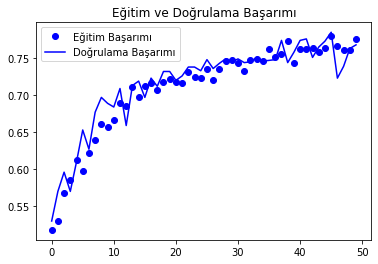

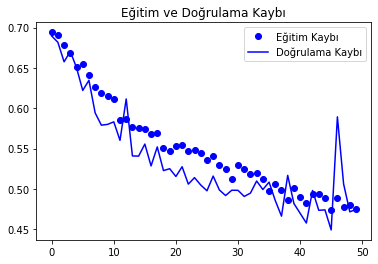

In [32]:
import matplotlib.pyplot as plt
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Eğitim Başarımı')
plt.plot(epochs, val_acc, 'b', label='Doğrulama Başarımı')
plt.title('Eğitim ve Doğrulama Başarımı')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Eğitim Kaybı')
plt.plot(epochs, val_loss, 'b', label='Doğrulama Kaybı')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.legend()


plt.show()

### Referanslar
- Python ile Derin Öğrenme (Buzdağı Yayınevi)
- Derin Öğrenme ile Kalabalık Analizi Üzerine Detaylı Bir Araştırma, Merve Ayyüce Kızrak, https://dergipark.org.tr/tr/download/article-file/520262 